10
[(-20, 6, -24), (-6, 34, -21), (-43, 19, -23), (-12, 46, -12), (-31, 18, -5), (-8, 2, -2), (0, 10, 1), (-6, 2, -44), (-35, 3, -36), (7, 7, 8)]
--------------------------------
Population Stats:  0
Best individual:  0.00107272182816
Average fitness:  0.000999894047622
^^^^^^^^^^^^^^^^^
[(9, 1, 9), (7, 7, 8), (-15, 1, -15), (-35, 3, -36), (1, 1, 1), (-6, 34, -21), (9, 1, 9), (-20, 6, -24), (-15, 1, -15), (-43, 19, -23), (-15, 1, -15), (0, 10, 1), (-15, 1, -15), (-6, 2, -44), (9, 1, 9), (-8, 2, -2), (9, 1, 9), (-31, 18, -5), (1, 1, 1), (-12, 46, -12)]
0.00102985737517
^^^^^^^^^^^^^^^^^
[(9, 1, 9), (-20, 6, -24), (9, 1, 9), (-6, 2, -44), (-15, 1, -15), (-43, 19, -23), (1, 1, 1), (-8, 2, -2), (-15, 1, -15), (-35, 3, -36), (9, 1, 9), (-6, 34, -21), (-15, 1, -15), (0, 10, 1), (1, 1, 1), (-31, 18, -5), (9, 1, 9), (-12, 46, -12), (-15, 1, -15), (7, 7, 8)]
0.000921732666796
^^^^^^^^^^^^^^^^^
[(9, 1, 9), (7, 7, 8), (-15, 1, -15), (-35, 3, -36), (1, 1, 1), (-6, 34, -21), (9, 1, 9), (-20, 6, -24

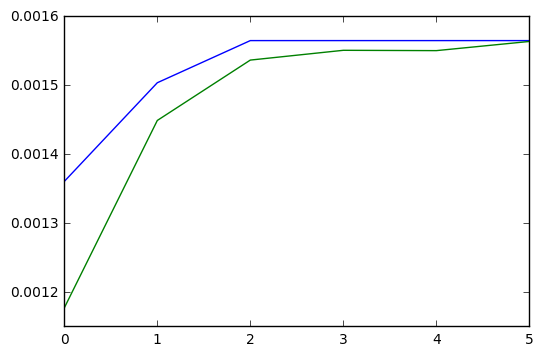

In [24]:
# %load genetic.py
import random
import numpy as np
import copy
from AStarAlgo import aStar
from matplotlib import pyplot as plt
# from shortest import shortest


# class building:
#     def __init__(self, coordinate, idx):
#         self.coordinate = coordinate
#         self.closest_water = None
#         self.id = idx


def eucld_dist(p1, p2, state):
    return np.linalg.norm(np.array(p1)-np.array(p2))


def A_star_dist(p1, p2, state):
    path = aStar(p1, p2, state)
    return len(path)


def prep_entity_objs(state, func_dist):
    water_list = []
    building_list = []
    id_to_position = {}
    position_to_id = {}
    water_dict = {}
    building_dict = {}
    counter = 0
    drone_pos = None
    for coor in state:
        if state[coor] == 'blue':
            top_coor = tuple([coor[0], coor[1] + 1, coor[2]])
            water_list.append(top_coor)
            water_dict[counter] = top_coor
            position_to_id[top_coor] = counter
            id_to_position[counter] = top_coor
            counter += 1
        if state[coor] == 'orange':
            top_coor = tuple([coor[0], coor[1]+2, coor[2]])
            building_list.append(top_coor)
            building_dict[counter] = top_coor
            position_to_id[top_coor] = counter
            id_to_position[counter] = top_coor
            counter += 1

        if state[coor] == 'drone':
            drone_pos = coor
    # for build in building_list:
    #     closest_water = None
    #     closest_dist = 1000
    #     for curr_water in water_list:
    #         curr_dist = func_dist(build.coordinate, curr_water, state)
    #         if curr_dist < closest_dist:
    #             closest_water = curr_water
    #             closest_dist = curr_dist
    #     build.closest_water = closest_water
    # return building_list, water_list, building_dict, water_dict, drone_pos, id_to_position
    return building_list, water_list, drone_pos


def generate_population(building_list, water_list, num):
    population = []
    for i in range(num):
        new_ind = []
        build_cop = copy.deepcopy(building_list)
        random.seed(random.randint(1, 10000))
        random.shuffle(build_cop)
        for elem in build_cop:
            idx = random.randint(0, len(water_list) - 1)
            new_ind.append(water_list[idx])
            new_ind.append(elem)
        population.append(new_ind)
    return population


def represent_ind_ids(ind):
    id_list = []
    for build in ind:
        id_list.append(build.id)
    return id_list


def crossover_identity(ind1, ind2):
    return ind1, ind2


def crossover_permute(ind1, ind2):
    idx_1 = 2 * random.randint(0, ((len(ind1) - 1) // 2))
    if idx_1 + 1 == len(ind1)-1:
        idx_2 = idx_1 + 1
    else:
        idx_2 = 2 * (random.randint((idx_1 + 2) // 2, (len(ind1)) // 2)) - 1
    pos_1 = min(idx_1, idx_2)
    pos_2 = max(idx_1, idx_2)
    piece_1 = ind1[pos_1:pos_2+1]
    piece_2 = ind2[pos_1:pos_2+1]
    dict_1 = {}
    dict_2 = {}
    dict_build_to_water = {}
    for i in range(len(piece_1)):
        if i % 2 == 1:
            dict_1[piece_2[i]] = piece_1[i]
            dict_2[piece_1[i]] = piece_2[i]
        else:
            dict_build_to_water[piece_1[i + 1]] = piece_1[i]
            dict_build_to_water[piece_2[i + 1]] = piece_2[i]

    child_1 = []
    child_2 = []
    for i in range(pos_1):
        if ind1[i] in dict_1:
            curr_used_id = ind1[i]
            while curr_used_id in dict_1:
                curr_used_id = dict_1[curr_used_id]
                if curr_used_id == ind1[i]:
                    break
            child_1.append(curr_used_id)
        else:
            child_1.append(ind1[i])

        if ind2[i] in dict_2:
            curr_used_id = ind2[i]
            while curr_used_id in dict_2:
                curr_used_id = dict_2[curr_used_id]
                if curr_used_id == ind2[i]:
                    break
            child_2.append(curr_used_id)
        else:
            child_2.append(ind2[i])

    child_1 += piece_2
    child_2 += piece_1

    if pos_2 + 1 < len(ind1):
        for i in range(pos_2+1, len(ind1)):
            if ind1[i] in dict_1:
                curr_used_id = ind1[i]
                while curr_used_id in dict_1:
                    curr_used_id = dict_1[curr_used_id]
                    if curr_used_id == ind1[i]:
                        break
                child_1.append(curr_used_id)
            else:
                child_1.append(ind1[i])

            if ind2[i] in dict_2:
                curr_used_id = ind2[i]
                while curr_used_id in dict_2:
                    curr_used_id = dict_2[curr_used_id]
                    if curr_used_id == ind2[i]:
                        break
                child_2.append(curr_used_id)
            else:
                child_2.append(ind2[i])
    return child_1, child_2


def crossover_permute_keep_waters(ind1, ind2):
    # print("+++++++++++++++++++++++++++++")
    idx_1 = 2 * random.randint(1, ((len(ind1) - 1) // 2)) - 1
    if ((idx_1+1) // 2) == ((len(ind1) - 1) // 2):
        # print("if")
        idx_2 = idx_1 + 1
    else:
        # print("left: ", idx_1 + 1 // 2)
        # print("right: ", (len(ind1) - 1) // 2)
        idx_2 = 2 * (random.randint((idx_1 + 1) // 2, (len(ind1) - 1) // 2))
    pos_1 = min(idx_1, idx_2)
    pos_2 = max(idx_1, idx_2)
    # print("ind1: ", ind1)
    # print("ind2: ", ind2)
    # print("pos1: ", pos_1)
    # print("pos2: ", pos_2)
    piece_1 = ind1[pos_1:pos_2+1]
    piece_2 = ind2[pos_1:pos_2+1]
    dict_1 = {}
    dict_2 = {}
    dict_build_to_water_1 = {}
    dict_build_to_water_2 = {}
    for i in range(len(piece_1)):
        if i % 2 == 1:
            dict_1[piece_2[i]] = piece_1[i]
            dict_2[piece_1[i]] = piece_2[i]
        else:
            dict_build_to_water_1[piece_1[i + 1]] = piece_1[i]
            dict_build_to_water_2[piece_2[i + 1]] = piece_2[i]

    child_1 = []
    child_2 = []
    for i in range(pos_1):
        if ind1[i] in dict_1:
            curr_used_id = ind1[i]
            while curr_used_id in dict_1:
                curr_used_id = dict_1[curr_used_id]
                if curr_used_id == ind1[i]:
                    break
            child_1[-1] = dict_build_to_water_1[curr_used_id]
            child_1.append(curr_used_id)
        else:
            child_1.append(ind1[i])

        if ind2[i] in dict_2:
            curr_used_id = ind2[i]
            while curr_used_id in dict_2:
                curr_used_id = dict_2[curr_used_id]
                if curr_used_id == ind2[i]:
                    break
            child_2[-1] = dict_build_to_water_2[curr_used_id]
            child_2.append(curr_used_id)
        else:
            child_2.append(ind2[i])

    child_1 += piece_2
    child_2 += piece_1

    if pos_2 + 1 < len(ind1):
        for i in range(pos_2+1, len(ind1)):
            if ind1[i] in dict_1:
                curr_used_id = ind1[i]
                while curr_used_id in dict_1:
                    curr_used_id = dict_1[curr_used_id]
                    if curr_used_id == ind1[i]:
                        break
                child_1[-1] = dict_build_to_water_1[curr_used_id]
                child_1.append(curr_used_id)
            else:
                child_1.append(ind1[i])

            if ind2[i] in dict_2:
                curr_used_id = ind2[i]
                while curr_used_id in dict_2:
                    curr_used_id = dict_2[curr_used_id]
                    if curr_used_id == ind2[i]:
                        break
                child_2[-1] = dict_build_to_water_2[curr_used_id]
                child_2.append(curr_used_id)
            else:
                child_2.append(ind2[i])
    # print("ch2: ", child_1)
    # print("ch2: ", child_2)
    return child_1, child_2


def binary_search(sorted_list, target):
    low = 0
    high = len(sorted_list)-1
    mid = -1
    while low < high:
        mid = (low + high) // 2
        if target < sorted_list[mid]:
            high = mid
            mid = (low + high) // 2
        elif target > sorted_list[mid]:
            low = mid + 1
            mid = (low + high) // 2
        else:
            return mid
    return mid


def rank_selecion(population_with_score, num_to_choose):
    sorted_list = sorted(population_with_score, key=lambda x: x[1], reverse=True)
    # print((represent_ind_ids(elem[0]), elem[1]) for elem in sorted_list)
    pop_size = len(population_with_score)
    share_sum = 0.0
    share_list = []
    for i in range(pop_size):
        new_share = 1.0/(i+2)
        share_list.append(new_share)
        share_sum += new_share
    # print("share list: ", share_list)
    prob_list = []
    for i in range(pop_size):
        new_prob = share_list[i]/share_sum
        prev_prob = 0.0
        if i > 0:
            prev_prob = prob_list[i-1]
        new_elem = new_prob + prev_prob
        prob_list.append(new_elem)
    prob_list[-1] = 1.0
    # print("prob list: ", prob_list)
    chosen_pop = []
    for i in range(num_to_choose-1):
        rand_num = random.random()
        # print("rand_num: ", rand_num)
        idx = binary_search(prob_list, rand_num)
        # print("idx: ", idx)
        chosen_pop.append(sorted_list[idx])
    chosen_pop.append(sorted_list[0])
    # print("first rank: ", sorted_list[0][1])
    return chosen_pop


def complete_fit_vals(pop_and_score, drone_pos, state, fit_func):
    for idx in range(len(pop_and_score)):
        ind, score = pop_and_score[idx]
        if score <= 0:
            new_score = fit_func(drone_pos, ind, state)
            pop_and_score[idx] = (ind, new_score)


def compute_population_score(drone_pos, func_dict, population, state, gen_num, fit_func, initial=False, print_inf=True):
    if initial:
        score_added_pop = [(ind, -1) for ind in population]
        population = score_added_pop
    # population_with_score = []
    fit_sum = 0.0
    fit_max = 0.0
    best_ind = None
    # for ind, score in population:
    for idx in range(len(population)):
        ind, score = population[idx]
        if score < 0:
            curr_fit = fit_func(drone_pos, ind, func_dict, state)
        else:
            curr_fit = score
        # population_with_score.append((ind, curr_fit))
        population[idx] = (ind, curr_fit)
        fit_sum += curr_fit
        if fit_max < curr_fit:
            best_ind = ind
            fit_max = curr_fit

    fit_average = fit_sum/len(population)
    if print_inf:
        print("--------------------------------")
        print("Population Stats: ", gen_num)
        print("Best individual: ", fit_max)
        print("Average fitness: ", fit_sum/len(population))

    return population, best_ind, fit_average, fit_max


def mutation_1_fit(ind_orig, score, state, drone_pos, fit_func, factor):
    """building with building"""
    ind = copy.deepcopy(ind_orig)
    pos1 = 2 * random.randint(1, len(ind) // 2) - 1
    pos2 = 2 * random.randint(1, len(ind) // 2) - 1
    ind[pos1], ind[pos2] = ind[pos2], ind[pos1]
    new_score = fit_func(drone_pos, ind, A_star_dist, state)
    return ind, new_score


def mutation_2_fit(ind_orig, score, state, drone_pos, fit_func, factor):
    """water with water"""
    ind = copy.deepcopy(ind_orig)
    pos1 = 2 * random.randint(0, (len(ind) - 1) // 2)
    pos2 = 2 * random.randint(0, (len(ind) - 1) // 2)
    ind[pos1], ind[pos2] = ind[pos2], ind[pos1]
    new_score = fit_func(drone_pos, ind, A_star_dist, state)
    return ind, new_score


def mutation_3_fit(ind_orig, score, water_list, state, drone_pos, fit_func, factor):
    """replace a water with a random water resource"""
    ind = copy.deepcopy(ind_orig)
    new_water_pos = random.randint(0, len(water_list)-1)
    pre_water_pos = 2 * random.randint(0, (len(ind) - 1) // 2)
    ind[pre_water_pos] = water_list[new_water_pos]
    new_score = fit_func(drone_pos, ind, A_star_dist, state)
    return ind, new_score


def mutation_1(ind_orig, score, state, fit_func, factor=1):
    """building with building"""
    ind = copy.deepcopy(ind_orig)
    pos1 = 2 * random.randint(1, len(ind) // 2) - 1
    pos2 = 2 * random.randint(1, len(ind) // 2) - 1
    post_1 = ind[pos1]
    if pos1 != len(ind) - 1:
        post_1 = ind[pos1 + 1]
    post_2 = ind[pos2]
    if pos2 != len(ind) - 1:
        post_2 = ind[pos2 + 1]
    new_score = 1.0/score - factor * A_star_dist(ind[pos1-1], ind[pos1], state) - A_star_dist(ind[pos1], post_1, state) - factor * A_star_dist(ind[pos2-1], ind[pos2], state) - A_star_dist(ind[pos2], post_2, state)
    ind[pos1], ind[pos2] = ind[pos2], ind[pos1]
    post_1 = ind[pos1]
    if pos1 != len(ind) - 1:
        post_1 = ind[pos1 + 1]
    post_2 = ind[pos2]
    if pos2 != len(ind) - 1:
        post_2 = ind[pos2 + 1]
    new_score = new_score + factor * A_star_dist(ind[pos1-1], ind[pos1], state) + A_star_dist(ind[pos1], post_1, state) + factor * A_star_dist(ind[pos2-1], ind[pos2], state) + A_star_dist(ind[pos2], post_2, state)
    return ind, 1.0/new_score


def mutation_2(ind_orig, score, state, drone_pos, fit_func, factor=1):
    """water with water"""
    ind = copy.deepcopy(ind_orig)
    pos1 = 2 * random.randint(0, (len(ind) - 1) // 2)
    pos2 = 2 * random.randint(0, (len(ind) - 1) // 2)
    prev_1 = drone_pos
    if pos1 != 0:
        prev_1 = ind[pos1-1]
    prev_2 = drone_pos
    if pos2 != 0:
        prev_2 = ind[pos2-1]
    new_score = 1.0/score - A_star_dist(prev_1, ind[pos1], state) - factor * A_star_dist(ind[pos1], ind[pos1+1], state) - A_star_dist(prev_2, ind[pos2], state) - factor * A_star_dist(ind[pos2], ind[pos2+1], state)
    ind[pos1], ind[pos2] = ind[pos2], ind[pos1]
    new_score = new_score + A_star_dist(prev_1, ind[pos1], state) + factor * A_star_dist(ind[pos1], ind[pos1+1], state) + A_star_dist(prev_2, ind[pos2], state) + factor * A_star_dist(ind[pos2], ind[pos2+1], state)
    return ind, 1.0/new_score


def mutation_3(ind_orig, score, water_list, state, drone_pos, fit_func, factor=1):
    """replace a water with a random water resource"""
    ind = copy.deepcopy(ind_orig)
    new_water_pos = random.randint(0, len(water_list)-1)
    pre_water_pos = 2 * random.randint(0, (len(ind) - 1) // 2)
    prev_1 = drone_pos
    if pre_water_pos != 0:
        prev_1 = ind[pre_water_pos-1]
    new_score = 1.0/score - A_star_dist(prev_1, ind[pre_water_pos], state) - factor * A_star_dist(ind[pre_water_pos], ind[pre_water_pos+1], state)
    ind[pre_water_pos] = water_list[new_water_pos]
    new_score = new_score + A_star_dist(prev_1, ind[pre_water_pos], state) + factor * A_star_dist(ind[pre_water_pos], ind[pre_water_pos+1], state)
    return ind, 1.0/new_score


def local_search(ind, curr_fit, itr, water_list, drone_pos, dist_func, state, fit_func, factor=1):
    best_ind = ind
    best_fit = curr_fit
    for i in range(itr):
        mut_1, fit_1 = mutation_1(best_ind, curr_fit, state, fit_func, factor)
        # fit_1_tmp = fitness(drone_pos, mut_1, dist_func, state)
        # if fit_1_tmp != fit_1:
        #     print("no1: " + str(fit_1_tmp) + ' ' + fit_1)
        if fit_1 > best_fit:
            best_ind = mut_1
            best_fit = fit_1
            break
        mut_2, fit_2 = mutation_2(best_ind, curr_fit, state, drone_pos, fit_func, factor)
        # fit_2_tmp = fitness(drone_pos, mut_2, dist_func, state)
        # if fit_2_tmp != fit_2:
        #     print("no2: " + str(fit_2_tmp) + ' ' + fit_2)
        if fit_2 > best_fit:
            best_ind = mut_2
            best_fit = fit_2
            break
        mut_3, fit_3 = mutation_3(best_ind, curr_fit, water_list, state, drone_pos, fit_func, factor)
        # fit_3_tmp = fitness(drone_pos, mut_3, dist_func, state)
        # if fit_3_tmp != fit_3:
        #     print("no3: " + str(fit_3_tmp) + ' ' + fit_3)
        if fit_3 > best_fit:
            best_ind = mut_3
            best_fit = fit_3
            break
    return best_ind, best_fit


def fitness_d_water(drone_pos, ind, dist_func, state):
    total_size = 0
    total_size += dist_func(drone_pos, ind[0], state)
    for i in range(len(ind)-1):
        if i % 2 == 0:
            total_size += 2 * dist_func(ind[i], ind[i+1], state)
        else:
            total_size += dist_func(ind[i], ind[i + 1], state)
    return 1.0/total_size


def fitness(drone_pos, ind, dist_func, state):
    total_size = 0
    total_size += dist_func(drone_pos, ind[0], state)
    for i in range(len(ind)-1):
        total_size += dist_func(ind[i], ind[i+1], state)
    return 1.0/total_size


def generate_children(pop_and_score, num_child, crossover_func, drone_pos, dist_func, state, fit_func):
    all_children = []
    for i in range(num_child//2):
        idx_1 = random.randint(0, len(pop_and_score)-1)
        idx_2 = random.randint(0, len(pop_and_score)-1)
        parent_1 = pop_and_score[idx_1][0]
        parent_2 = pop_and_score[idx_2][0]
        child_1, child_2 = crossover_func(parent_1, parent_2)
        all_children.append((child_1, fit_func(drone_pos, child_1, dist_func, state)))
        all_children.append((child_2, fit_func(drone_pos, child_2, dist_func, state)))
    return all_children


def genetic_algorithm(state, dist_func, fit_func, factor=1, pop_size=10000, lamda=10000, mutation_prob=0.1, num_generation=500, not_better=10, get_initial=False, init_pop=None):
    building_list, water_list, drone_pos = prep_entity_objs(state, dist_func)
    if get_initial:
        initial_population = init_pop
    else:
        initial_population = generate_population(building_list, water_list, pop_size-1)

    # basepath = shortest(state)
    # initial_population.append(basepath)

    # new_generation = initial_population
    best_ind = None
    max_fit = 0.0
    max_list = []
    avg_list = []

    initial_flag = True
    if get_initial:
        initial_flag = False

    pop_and_score, curr_best, curr_avg, curr_max = \
        compute_population_score(drone_pos, dist_func, initial_population, state, 0, fit_func, initial=initial_flag, print_inf=initial_flag)

    print("initialization is done!")

    max_list.append(curr_max)
    avg_list.append(curr_avg)
    if curr_max > max_fit:
        best_ind = curr_best
        max_fit = curr_max

    counter_best = 0
    counter_avg = 0
    # new_generation = pop_and_score
    for i in range(num_generation):
        # print("loop: ", i)
        children = generate_children(pop_and_score, lamda, crossover_permute, drone_pos, dist_func, state, fit_func)

        # print("children generated!")
        big_population = pop_and_score + children
        # print("going to mutate: ", len(big_population))

        mutated_list = []
        for idx, elem in enumerate(big_population):
            # print("idx: ", idx)
            ind = elem[0]
            curr_score = elem[1]
            rand_num = random.random()
            if rand_num <= mutation_prob:
                mutated, its_fit = mutation_1_fit(ind, curr_score, state, drone_pos, fit_func, factor)
                # its_fit = fitness(drone_pos, mutated, dist_func, state)
                # big_population[idx] = (mutated, its_fit)
                mutated_list.append((mutated, its_fit))
            # print("mut 1 done")
            rand_num = random.random()
            if rand_num <= mutation_prob:
                mutated, its_fit = mutation_2_fit(ind, curr_score, state, drone_pos, fit_func, factor)
                # its_fit = fitness(drone_pos, mutated, dist_func, state)
                # big_population[idx] = (mutated, its_fit)
                mutated_list.append((mutated, its_fit))
            # print("mut 2 done")
            rand_num = random.random()
            if rand_num <= mutation_prob:
                mutated, its_fit = mutation_3_fit(ind, curr_score, water_list, state, drone_pos, fit_func, factor)
                # its_fit = fitness(drone_pos, mutated, dist_func, state)
                # big_population[idx] = (mutated, its_fit)
                mutated_list.append((mutated, its_fit))
        # print("mutations are applied.")

        big_population = big_population + mutated_list
        new_generation = rank_selecion(big_population, pop_size)
        # print("done with selection!")
        # new_generation.append((curr_best, curr_max))

        pop_and_score, curr_best, curr_avg, curr_max = compute_population_score(drone_pos, dist_func, new_generation,
                                                                                state, i+1, fit_func, print_inf=initial_flag)

        # print("new generation was evaluated.")
        if curr_avg > avg_list[-1]:
            counter_avg = 0
        else:
            counter_avg += 1
            if counter_avg > not_better:
                print("!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                print("No progress in average for " + str(not_better) + " generations.")
                print("!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                break

        max_list.append(curr_max)
        avg_list.append(curr_avg)
        if curr_max > max_fit:
            best_ind = curr_best
            max_fit = curr_max
            counter_best = 0
        else:
            counter_best += 1
            if counter_best > 1*not_better:
                print("!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                print("No progress in best answer for " + str(not_better) + " generations.")
                print("!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                break


    # best_path = []
    # best_ind_ids = represent_ind_ids(best_ind)

    # for key in best_ind_ids:
    #     best_path.append(id_to_build[key].coordinate)
    #     best_path.append(id_to_build[key].closest_water)
    if get_initial:
        return pop_and_score
    return best_ind, max_list, avg_list


def get_mutated_list(big_population, mutation_prob, dist_func, drone_pos, water_list, state, fit_func, factor=1):
    mutated_list = []
    for idx, elem in enumerate(big_population):
        # print("idx: ", idx)
        ind = elem[0]
        curr_score = elem[1]
        rand_num = random.random()
        if rand_num <= mutation_prob:
            mutated, its_fit = mutation_1(ind, curr_score, state, fit_func, factor)
            # its_fit = fitness(drone_pos, mutated, dist_func, state)
            # big_population[idx] = (mutated, its_fit)
            mutated_list.append((mutated, its_fit))
        # print("mut 1 done")
        rand_num = random.random()
        if rand_num <= mutation_prob:
            mutated, its_fit = mutation_2(ind, curr_score, state, drone_pos, fit_func, factor)
            # its_fit = fitness(drone_pos, mutated, dist_func, state)
            # big_population[idx] = (mutated, its_fit)
            mutated_list.append((mutated, its_fit))
        # print("mut 2 done")
        rand_num = random.random()
        if rand_num <= mutation_prob:
            mutated, its_fit = mutation_3(ind, curr_score, water_list, state, drone_pos, fit_func, factor)
            # its_fit = fitness(drone_pos, mutated, dist_func, state)
            # big_population[idx] = (mutated, its_fit)
            mutated_list.append((mutated, its_fit))
    return mutated_list


def each_memeplex(drone_pos, dist_func, subpop_and_score, state, water_list, lamda, crossover_func, mutation_prob, fit_func, factor=1):
    loc_opt_pop = []
    for ind, score in subpop_and_score:
        loc_opt_ind = local_search(ind, score, 10, water_list, drone_pos, dist_func, state, fit_func, factor)
        loc_opt_pop.append(loc_opt_ind)

    print("local search done!")

    children = generate_children(loc_opt_pop, lamda, crossover_permute, drone_pos, dist_func, state, fit_func)

    loc_opt_pop += children

    muted_list = get_mutated_list(loc_opt_pop, mutation_prob, dist_func, drone_pos, water_list, state, fit_func, factor)
    loc_opt_pop += muted_list

    new_subpop = rank_selecion(loc_opt_pop, len(subpop_and_score))

    return new_subpop


def each_memeplex_new(drone_pos, dist_func, subpop_and_score, state, water_list, lamda, crossover_func, mutation_prob, fit_func, factor=1):
    loc_opt_pop = []
    for ind, score in subpop_and_score:
        loc_opt_ind = local_search(ind, score, 10, water_list, drone_pos, dist_func, state, fit_func, factor)
        loc_opt_pop.append(loc_opt_ind)
    print("local search done!")
    new_subpop = loc_opt_pop
    for i in range(5):
        # print(new_subpop)
        new_subpop = genetic_algorithm(state, dist_func, fit_func, factor, pop_size=len(new_subpop), lamda=len(new_subpop), mutation_prob=0.1, num_generation=5, not_better=3, get_initial=True, init_pop=new_subpop)
    return new_subpop


def divide_pop(population, pop_size, memeplex):
    random.shuffle(population)
    each_size = pop_size // memeplex
    divided_list = []
    for i in range(memeplex):
        curr_list = population[i*each_size:(i+1)*each_size]
        divided_list.append(curr_list)
    return divided_list


def new_alg_2(state, dist_func, fit_func, factor=1, pop_size=10000, memeplex=50, lamda=300, mutation_prob=0.1, num_generation=500, not_better=10):
    building_list, water_list, drone_pos = prep_entity_objs(state, dist_func)
    initial_population = generate_population(building_list, water_list, pop_size-1)

    # basepath = shortest(state)
    # initial_population.append(basepath)

    # new_generation = initial_population
    best_ind = None
    max_fit = 0.0
    max_list = []
    avg_list = []

    pop_and_score, curr_best, curr_avg, curr_max = \
        compute_population_score(drone_pos, dist_func, initial_population, state, 0, fit_func, initial=True)

    print("initialization is done!")

    max_list.append(curr_max)
    avg_list.append(curr_avg)
    if curr_max > max_fit:
        best_ind = curr_best
        max_fit = curr_max

    counter_best = 0
    counter_avg = 0
    curr_generation = pop_and_score
    for i in range(num_generation):
        print("generation: ", i)
        sub_list = divide_pop(curr_generation, pop_size, memeplex)
        print("divided!")
        new_generation = []
        for j in range(memeplex):
            new_sub_pop = each_memeplex_new(drone_pos, dist_func, sub_list[j], state, water_list, lamda, crossover_permute, mutation_prob, fit_func, factor)
            print("new sub pop done! ", j)
            new_generation += new_sub_pop

        print("go to stat:")
        pop_and_score, curr_best, curr_avg, curr_max = compute_population_score(drone_pos, dist_func, new_generation,
                                                                                state, i+1, fit_func)

        curr_generation = pop_and_score
        if curr_avg > avg_list[-1]:
            counter_avg = 0
        else:
            counter_avg += 1
            if counter_avg > not_better:
                print("!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                print("No progress in average for " + str(not_better) + " generations.")
                print("!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                break

        max_list.append(curr_max)
        avg_list.append(curr_avg)
        if curr_max > max_fit:
            best_ind = curr_best
            max_fit = curr_max
            counter_best = 0
        else:
            counter_best += 1
            if counter_best > 1*not_better:
                print("!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                print("No progress in best answer for " + str(not_better) + " generations.")
                print("!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                break


    # best_path = []
    # best_ind_ids = represent_ind_ids(best_ind)

    # for key in best_ind_ids:
    #     best_path.append(id_to_build[key].coordinate)
    #     best_path.append(id_to_build[key].closest_water)

    return best_ind, max_list, avg_list



def new_alg(state, dist_func, fit_func, factor=1, pop_size=10000, memeplex=50, lamda=300, mutation_prob=0.1, num_generation=500, not_better=10):
    building_list, water_list, drone_pos = prep_entity_objs(state, dist_func)
    initial_population = generate_population(building_list, water_list, pop_size-1)

    # basepath = shortest(state)
    # initial_population.append(basepath)

    # new_generation = initial_population
    best_ind = None
    max_fit = 0.0
    max_list = []
    avg_list = []

    pop_and_score, curr_best, curr_avg, curr_max = \
        compute_population_score(drone_pos, dist_func, initial_population, state, 0, fit_func, initial=True)

    print("initialization is done!")

    max_list.append(curr_max)
    avg_list.append(curr_avg)
    if curr_max > max_fit:
        best_ind = curr_best
        max_fit = curr_max

    counter_best = 0
    counter_avg = 0
    curr_generation = pop_and_score
    for i in range(num_generation):
        print("generation: ", i)
        sub_list = divide_pop(curr_generation, pop_size, memeplex)
        print("divided!")
        new_generation = []
        for j in range(memeplex):
            new_sub_pop = each_memeplex(drone_pos, dist_func, sub_list[j], state, water_list, lamda, crossover_permute, mutation_prob, fit_func, factor)
            print("new sub pop done! ", j)
            new_generation += new_sub_pop

        print("go to stat:")
        pop_and_score, curr_best, curr_avg, curr_max = compute_population_score(drone_pos, dist_func, new_generation,
                                                                                state, i+1, fit_func)

        curr_generation = pop_and_score
        if curr_avg > avg_list[-1]:
            counter_avg = 0
        else:
            counter_avg += 1
            if counter_avg > not_better:
                print("!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                print("No progress in average for " + str(not_better) + " generations.")
                print("!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                break

        max_list.append(curr_max)
        avg_list.append(curr_avg)
        if curr_max > max_fit:
            best_ind = curr_best
            max_fit = curr_max
            counter_best = 0
        else:
            counter_best += 1
            if counter_best > 1*not_better:
                print("!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                print("No progress in best answer for " + str(not_better) + " generations.")
                print("!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                break


    # best_path = []
    # best_ind_ids = represent_ind_ids(best_ind)

    # for key in best_ind_ids:
    #     best_path.append(id_to_build[key].coordinate)
    #     best_path.append(id_to_build[key].closest_water)

    return best_ind, max_list, avg_list


def memetic_algorithm(state, dist_func, fit_func, factor=1, pop_size=10000, lamda=15000, mutation_prob=0.1, num_generation=500, not_better=10):
    building_list, water_list, drone_pos = prep_entity_objs(state, dist_func)
    initial_population = generate_population(building_list, water_list, pop_size-1)

    # basepath = shortest(state)
    # initial_population.append(basepath)
    
 
    best_ind = None
    max_fit = 0.0
    max_list = []
    avg_list = []

    pop_and_score, curr_best, curr_avg, curr_max = \
        compute_population_score(drone_pos, dist_func, initial_population, state, 0, fit_func, initial=True)

    print("initialization is done!")

    max_list.append(curr_max)
    avg_list.append(curr_avg)
    if curr_max > max_fit:
        best_ind = curr_best
        max_fit = curr_max

    counter_best = 0
    counter_avg = 0
    # new_generation = pop_and_score
    for i in range(num_generation):
        # print("loop: ", i)
        children = generate_children(pop_and_score, lamda, crossover_permute, drone_pos, dist_func, state, fit_func)

        # print("children generated!")
        big_population = pop_and_score + children
        # print("going to mutate: ", len(big_population))
        opt_big = []
        for_counter = 0
        for path, score in big_population:
            if for_counter % 500 == 0:
                print(for_counter)
            opt_path, new_score = local_search(path, score, 10, water_list, drone_pos, dist_func, state, fit_func, factor)
            opt_big.append((opt_path, new_score))
            for_counter += 1

        print("finished generating all the points in local optima")
        big_population = opt_big
        mutated_list = []
        for idx, elem in enumerate(big_population):
            # print("idx: ", idx)
            ind = elem[0]
            curr_score = elem[1]
            rand_num = random.random()
            if rand_num <= mutation_prob:
                mutated, its_fit = mutation_1(ind, curr_score, state, fit_func, factor)
                # its_fit = fitness(drone_pos, mutated, dist_func, state)
                # big_population[idx] = (mutated, its_fit)
                mutated_list.append((mutated, its_fit))
            # print("mut 1 done")
            rand_num = random.random()
            if rand_num <= mutation_prob:
                mutated, its_fit = mutation_2(ind, curr_score, state, drone_pos, fit_func, factor)
                # its_fit = fitness(drone_pos, mutated, dist_func, state)
                # big_population[idx] = (mutated, its_fit)
                mutated_list.append((mutated, its_fit))
            # print("mut 2 done")
            rand_num = random.random()
            if rand_num <= mutation_prob:
                mutated, its_fit = mutation_3(ind, curr_score, water_list, state, drone_pos, fit_func, factor)
                # its_fit = fitness(drone_pos, mutated, dist_func, state)
                # big_population[idx] = (mutated, its_fit)
                mutated_list.append((mutated, its_fit))
        print("mutations are applied.")

        big_population = big_population + mutated_list
        new_generation = rank_selecion(big_population, pop_size)
        print("done with selection!")
        # new_generation.append((curr_best, curr_max))

        pop_and_score, curr_best, curr_avg, curr_max = compute_population_score(drone_pos, dist_func, new_generation,
                                                                                state, i+1, fit_func)

        print("new generation was evaluated.")
        if curr_avg > avg_list[-1]:
            counter_avg = 0
        else:
            counter_avg += 1
            if counter_avg > not_better:
                print("!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                print("No progress in average for " + str(not_better) + " generations.")
                print("!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                break

        max_list.append(curr_max)
        avg_list.append(curr_avg)
        if curr_max > max_fit:
            best_ind = curr_best
            max_fit = curr_max
            counter_best = 0
        else:
            counter_best += 1
            if counter_best > 1*not_better:
                print("!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                print("No progress in best answer for " + str(not_better) + " generations.")
                print("!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                break


    # best_path = []
    # best_ind_ids = represent_ind_ids(best_ind)

    # for key in best_ind_ids:
    #     best_path.append(id_to_build[key].coordinate)
    #     best_path.append(id_to_build[key].closest_water)

    return best_ind, max_list, avg_list


if __name__ == '__main__':
    state = {
        (9, 0, 9): 'blue',
        (1, 0, 1): 'blue',
        (-15, 0, -15): 'blue',
        (7, 5, 8): 'orange',
        (0, 8, 1): 'orange',
        (-20, 4, -24): 'orange',
        (-6, 0, -44): 'orange',
        (-31, 16, -5): 'orange',
        (-35, 1, -36): 'orange',
        (-43, 17, -23): 'orange',
        (-12, 44, -12): 'orange',
        (-8, 0, -2): 'orange',
        (-6, 32, -21): 'orange',
        (26, 20, 23): 'drone'
    }

    building_list, water_list, drone_pos = prep_entity_objs(state, eucld_dist)
    print(len(building_list))

    # for build in building_list:
    #     print('--------------------')
    #     print(build.coordinate)
    #     print(build.closest_water)

    print(building_list)
    population = generate_population(building_list, water_list, 5)
    # for ind in population:
    #     print("-------------")
    #     print(ind)
    #     print(fitness((0, 0, 0),ind,eucld_dist,state))
    #     print(mutation_1(ind))

    ind_1 = population[0]
    ind_2 = population[1]

    ch1, ch2 = crossover_permute(ind_1, ind_2)

    pop_and_score, best_ind, _, _ = compute_population_score((0,0,0), eucld_dist, population, state, 0, fitness_d_water, initial=True)
    # for elem in pop_and_score:
    #     print("*********")
    #     print(elem[1])
    #     print(represent_ind_ids(elem[0]))

    # print(represent_ind_ids(best_ind))

    chosen_pop = rank_selecion(pop_and_score, 10)
    for ind in chosen_pop:
        print("^^^^^^^^^^^^^^^^^")
        print(ind[0])
        print(ind[1])

    best_path, max_list, avg_list = new_alg_2(state, A_star_dist, fitness_d_water, factor=2, pop_size=20, memeplex=4, lamda=5, mutation_prob=0.1, num_generation=5, not_better=10)
    # best_path, max_list, avg_list = genetic_algorithm(state, A_star_dist, fitness_d_water, factor=2, pop_size=20, lamda=20, num_generation=10)
    print(best_path)

    plt.plot(max_list)
    plt.plot(avg_list)
    plt.show()


In [26]:
import random
import copy
def crossover_permute(ind1, ind2):
    idx_1 = 2 * random.randint(0, ((len(ind1) - 1) // 2))
    print("idx_1: ", idx_1)
    if idx_1 + 1 == len(ind1)-1:
        idx_2 = idx_1 + 1
        print("idx_2: ", idx_2)
    else:
        idx_2 = 2 * (random.randint((idx_1 + 2) // 2, (len(ind1)) // 2)) - 1
        print("idx_2: ", idx_2)
    pos_1 = min(idx_1, idx_2)
    pos_2 = max(idx_1, idx_2)
    print("pos1: ", pos_1)
    print("pos2: ", pos_2)
    piece_1 = ind1[pos_1:pos_2+1]
    piece_2 = ind2[pos_1:pos_2+1]
    print("piece 1: ", piece_1)
    print("piece 2: ", piece_2)
    dict_1 = {}
    dict_2 = {}
    dict_build_to_water = {}
    for i in range(len(piece_1)):
        print ("i: ", i)
        if i % 2 == 1:
            dict_1[piece_2[i]] = piece_1[i]
            dict_2[piece_1[i]] = piece_2[i]
            print("dict1: ", dict_1)
            print("dict2: ", dict_2)
        else:
            dict_build_to_water[piece_1[i + 1]] = piece_1[i]
            dict_build_to_water[piece_2[i + 1]] = piece_2[i]
            print ("dict_water:", dict_build_to_water)

    child_1 = []
    child_2 = []
    for i in range(pos_1):
        print("i: ", i)
        if ind1[i] in dict_1:
            print("entered ind1[i] in dict_1")
            curr_used_id = ind1[i]
            print ("curr used id: ", curr_used_id)
            while curr_used_id in dict_1:
                print("enterd curr used id in dict_1")
                curr_used_id = dict_1[curr_used_id]
                print ("curr used id: ", curr_used_id)
                if curr_used_id == ind1[i]:
                    break
            child_1.append(curr_used_id)
            print("child 1", child_1)
        else:
            print("entered else of ind1[i] in dict_1")
            child_1.append(ind1[i])
            print("child 1", child_1)

        if ind2[i] in dict_2:
            print("entered ind2[i] in dict_2")
            curr_used_id = ind2[i]
            print ("curr used id: ", curr_used_id)
            while curr_used_id in dict_2:
                print("enterd curr used id in dict_2")
                curr_used_id = dict_2[curr_used_id]
                print ("curr used id: ", curr_used_id)
                if curr_used_id == ind2[i]:
                    break
            child_2.append(curr_used_id)
            print("child 2", child_2)
        else:
            child_2.append(ind2[i])
            print("child 2", child_2)

    child_1 += piece_2
    child_2 += piece_1

    if pos_2 + 1 < len(ind1):
        for i in range(pos_2+1, len(ind1)):
            if ind1[i] in dict_1:
                print("entered if of pos_2 +1<len(ind1) ")
                curr_used_id = ind1[i]
                while curr_used_id in dict_1:
                    curr_used_id = dict_1[curr_used_id]
                    if curr_used_id == ind1[i]:
                        break
                child_1.append(curr_used_id)
            else:
                print("entered else of pos_2 +1<len(ind1) ")
                child_1.append(ind1[i])

            if ind2[i] in dict_2:
                print("entered if of pos_2 +1<len(ind1) ")
                curr_used_id = ind2[i]
                while curr_used_id in dict_2:
                    curr_used_id = dict_2[curr_used_id]
                    if curr_used_id == ind2[i]:
                        break
                child_2.append(curr_used_id)
            else:
                print("entered else of pos_2 +1<len(ind1) ")
                child_2.append(ind2[i])
    return child_1, child_2

if __name__=="__main__":
    print (crossover_permute([1,2,3,4,5,6], [11,12,13,14,15,16]))

idx_1:  0
idx_2:  3
pos1:  0
pos2:  3
piece 1:  [1, 2, 3, 4]
piece 2:  [11, 12, 13, 14]
i:  0
dict_water: {2: 1, 12: 11}
i:  1
dict1:  {12: 2}
dict2:  {2: 12}
i:  2
dict_water: {4: 3, 2: 1, 12: 11, 14: 13}
i:  3
dict1:  {12: 2, 14: 4}
dict2:  {2: 12, 4: 14}
entered else of pos_2 +1<len(ind1) 
entered else of pos_2 +1<len(ind1) 
entered else of pos_2 +1<len(ind1) 
entered else of pos_2 +1<len(ind1) 
([11, 12, 13, 14, 5, 6], [1, 2, 3, 4, 15, 16])
